In [1]:
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima_model import ARMA
import seaborn as sns
sns.set()

In [2]:
import pandas as pd
df = pd.read_csv('crude-oil-360.csv', header=[1], index_col=[0])

In [3]:
df.head()

,Price,Change
Month,,
Jan-89,16.48,-
Feb-89,16.35,-0.79%
Mar-89,18.03,10.28%
Apr-89,19.20,6.49%
May-89,18.02,-6.15%


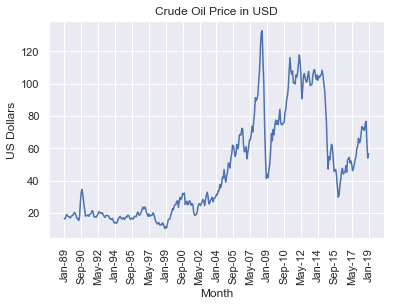

In [6]:
# Plot of prices
crude_oil = df['Price']
plt.plot(crude_oil)
plt.title('Crude Oil Price in USD')
plt.ylabel('US Dollars')
plt.xlabel('Month')
plt.xticks(np.arange(361,step=20), rotation='vertical' )
plt.show()

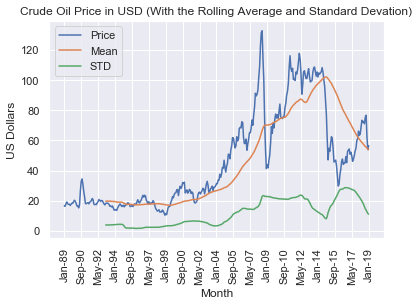

In [7]:
crude_oil = df['Price']
plt.plot(crude_oil)


rollmean = crude_oil.rolling(window=50,center=False).mean()
rollstd = crude_oil.rolling(window=50,center=False).std()
#Crude_Pricee = plt.plot(crudeoil)
Mean = plt.plot(rollmean)
STD = plt.plot(rollstd)
plt.legend(['Price', 'Mean', 'STD'])


plt.title('Crude Oil Price in USD (With the Rolling Average and Standard Devation)')
plt.ylabel('US Dollars')
plt.xlabel('Month')
plt.xticks(np.arange(361,step=20), rotation='vertical' )
plt.show()

In [11]:
from statsmodels.tsa.stattools import adfuller
print('P Value of the AD Fullter Test for the crude oil data:' ,adfuller(crude_oil)[1])

P Value of the AD Fullter Test for the crude oil data: 0.23137955776957292


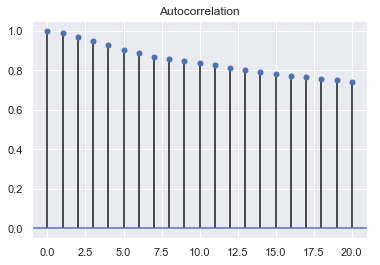

In [12]:
# plot of the autocorrelation before making the data stationary
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(crude_oil, alpha=1, lags=20)
plt.show()

In [13]:
# Logging the data to make the variation constant and differencing the logged data to make it stationary
#crude_oil_log = np.log(crude_oil)
crude_2 = crude_oil.diff()
crude_2 = crude_2.dropna()

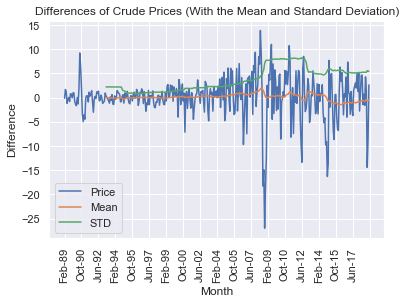

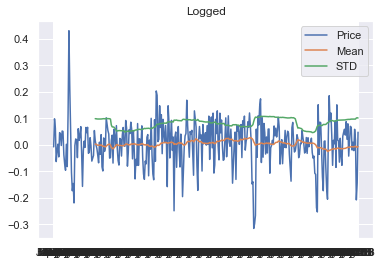

In [14]:
# Plotting the differences of the logged data 

rolmean = crude_2.rolling(window=50,center=False).mean()
rolstd = crude_2.rolling(window=50,center=False).std()
Crude_Price = plt.plot(crude_2)
Mean = plt.plot(rolmean)
STD = plt.plot(rolstd)
plt.legend(['Price','Mean','STD'])
plt.title('Differences of Crude Prices (With the Mean and Standard Deviation)')
plt.xlabel('Month')
plt.ylabel('Difference')
plt.xticks(np.arange(361,step=20), rotation='vertical' )
plt.show()


logdif = np.log(crude_oil).diff()
logdiff = logdif.dropna()
rolmeanl = logdif.rolling(window=50,center=False).mean()
rolstdl = logdif.rolling(window=50,center=False).std()
Crude_Price_L = plt.plot(logdif)
Meanl = plt.plot(rolmeanl)
STDl = plt.plot(rolstdl)
plt.legend(['Price','Mean','STD'])
plt.title('Logged')
plt.show()

In [15]:
# AD Fuller test to test the null hypothesis that the co efficient for one lag is 1, which would provide no
# information in regards to forecasting
print('P Value for the adfuller test for LOGDIFF:', adfuller(logdiff)[1])
print('P Value for the adfuller test for DIFF:', adfuller(crude_2)[1])

P Value for the adfuller test for LOGDIFF: 9.838146947868909e-26
P Value for the adfuller test for DIFF: 1.395142494853774e-14


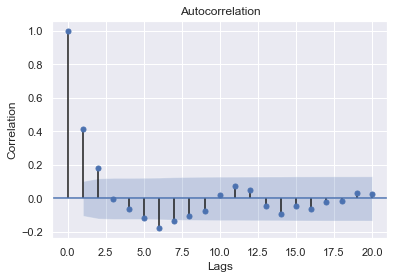

In [16]:
# Plotting autocorrelation of stationary data
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(crude_2, lags=20)
plt.xlabel('Lags')
plt.ylabel('Correlation')
plt.show()

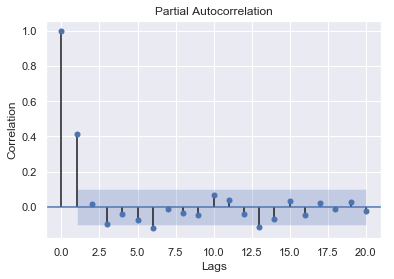

In [17]:
# Plotting the partial correlation to see which lag is statistically significant. 
plot_pacf(crude_2, lags=20)
plt.xlabel('Lags')
plt.ylabel('Correlation')
plt.show()

/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was pro

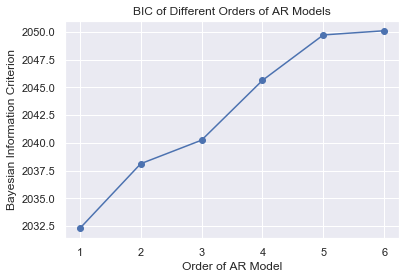

In [18]:
# Plotting the BIC of different lags to see which is best. The lower the BIC, the better. 
BIC = np.zeros(7)
for p in range(7):
    mod = ARMA(crude_2, order=(p,0))
    res = mod.fit()   
    BIC[p] = res.bic
plt.plot(range(1,7), BIC[1:7], marker='o')
plt.xlabel('Order of AR Model')
plt.ylabel('Bayesian Information Criterion')
plt.title('BIC of Different Orders of AR Models')
plt.show()

In [19]:
# Statistics for the AR 1 model, which uses one lag period. 
modar = ARMA(crude_2, order=(1,0))
resultar = modar.fit()
print(resultar.summary())

                              ARMA Model Results                              
Dep. Variable:                  Price   No. Observations:                  360
Model:                     ARMA(1, 0)   Log Likelihood               -1007.311
Method:                       css-mle   S.D. of innovations              3.970
Date:                Sun, 03 Mar 2019   AIC                           2020.622
Time:                        02:39:25   BIC                           2032.281
Sample:                             0   HQIC                          2025.258
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.1158      0.356      0.325      0.745      -0.582       0.813
ar.L1.Price     0.4133      0.048      8.628      0.000       0.319       0.507
                                    Roots       

/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [20]:
resultar.fittedvalues

Month
Feb-89    0.115808
Mar-89    0.014223
Apr-89    0.762244
May-89    0.551476
Jun-89   -0.419713
Jul-89   -0.093228
Aug-89    0.084479
Sep-89   -0.258537
Oct-89    0.394433
Nov-89    0.377902
Dec-89    0.047284
Jan-90    0.472954
Feb-90    0.481220
Mar-90   -0.242006
Apr-90   -0.502367
May-90   -0.622216
Jun-90    0.080346
Jul-90   -0.473438
Aug-90    0.853164
Sep-90    3.882445
Oct-90    2.671559
Nov-90    0.811837
Dec-90   -1.345441
Jan-91   -1.977747
Feb-91   -1.399166
Mar-91   -1.771111
Apr-91    0.043152
May-91    0.233257
Jun-91    0.212593
Jul-91   -0.299864
            ...   
Aug-16   -1.403299
Sep-16    0.377902
Oct-16    0.134071
Nov-16    1.824352
Dec-16   -1.597537
Jan-17    3.109627
Feb-17    0.468821
Mar-17    0.382034
Apr-17   -1.357839
May-17    0.588670
Jun-17   -0.870179
Jul-17   -1.469422
Aug-17    0.683723
Sep-17    1.010207
Oct-17    1.311896
Nov-17    0.882093
Dec-17    2.138439
Jan-18    0.588670
Feb-18    2.150837
Mar-18   -1.076814
Apr-18    0.361371
May-18

In [21]:
crude_2

Month
Feb-89    -0.13
Mar-89     1.68
Apr-89     1.17
May-89    -1.18
Jun-89    -0.39
Jul-89     0.04
Aug-89    -0.79
Sep-89     0.79
Oct-89     0.75
Nov-89    -0.05
Dec-89     0.98
Jan-90     1.00
Feb-90    -0.75
Mar-90    -1.38
Apr-90    -1.67
May-90     0.03
Jun-90    -1.31
Jul-90     1.90
Aug-90     9.23
Sep-90     6.30
Oct-90     1.80
Nov-90    -3.42
Dec-90    -4.95
Jan-91    -3.55
Feb-91    -4.45
Mar-91    -0.06
Apr-91     0.40
May-91     0.35
Jun-91    -0.89
Jul-91     1.12
          ...  
Aug-16     0.75
Sep-16     0.16
Oct-16     4.25
Nov-16    -4.03
Dec-16     7.36
Jan-17     0.97
Feb-17     0.76
Mar-17    -3.45
Apr-17     1.26
May-17    -2.27
Jun-17    -3.72
Jul-17     1.49
Aug-17     2.28
Sep-17     3.01
Oct-17     1.97
Nov-17     5.01
Dec-17     1.26
Jan-18     5.04
Feb-18    -2.77
Mar-18     0.71
Apr-18     4.62
May-18     4.64
Jun-18    -1.45
Jul-18     0.69
Aug-18    -1.59
Sep-18     4.28
Oct-18     1.37
Nov-18   -14.41
Dec-18    -8.36
Jan-19     2.62
Name: Price, Lengt

/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was pro

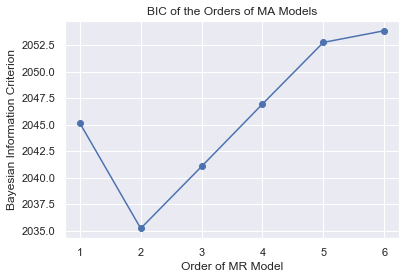

In [22]:
# Plotting the BIC of different ERROR lags to see which is best. The lower the BIC, the better. 
BICma = np.zeros(7)
for p in range(7):
    modma = ARMA(crude_2, order=(0,p))
    resma = modma.fit()   
    BICma[p] = resma.bic
plt.plot(range(1,7), BICma[1:7], marker='o')
plt.xlabel('Order of MR Model')
plt.ylabel('Bayesian Information Criterion')
plt.title('BIC of the Orders of MA Models')
plt.show()

In [27]:
# MA Statistics
from statsmodels.tsa.arima_model import ARMA, ARIMA
modma = ARMA(logdiff, order=(0,2))
resultma = modma.fit()
print(resultma.summary())

                              ARMA Model Results                              
Dep. Variable:                  Price   No. Observations:                  360
Model:                     ARMA(0, 2)   Log Likelihood                 395.613
Method:                       css-mle   S.D. of innovations              0.081
Date:                Sun, 03 Mar 2019   AIC                           -783.226
Time:                        02:39:45   BIC                           -767.682
Sample:                             0   HQIC                          -777.045
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0035      0.006      0.586      0.558      -0.008       0.015
ma.L1.Price     0.3076      0.052      5.912      0.000       0.206       0.410
ma.L2.Price     0.0893      0.055      1.610    

/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [24]:
# ARMA statistics
modarma = ARMA(logdiff, order=(1,2))
resultarma = modarma.fit()
print(resultarma.summary())

/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                              ARMA Model Results                              
Dep. Variable:                  Price   No. Observations:                  360
Model:                     ARMA(1, 2)   Log Likelihood                 395.650
Method:                       css-mle   S.D. of innovations              0.081
Date:                Sun, 03 Mar 2019   AIC                           -781.300
Time:                        02:39:31   BIC                           -761.870
Sample:                             0   HQIC                          -773.574
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0035      0.006      0.579      0.563      -0.008       0.015
ar.L1.Price     0.1004      0.355      0.283      0.778      -0.596       0.796
ma.L1.Price     0.2092      0.353      0.593    

/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


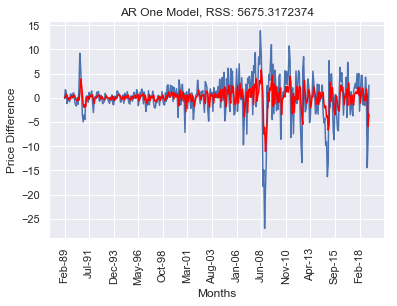

In [28]:
### Plotting the AR fitted values with the actual values. 
### Residual sums of squares to compare the different models e.g. AR, MA, ARMA
modelar = ARIMA(crude_oil, order=(1,1,0))  
results_ARIMAar = modelar.fit(disp=-1)  
plt.plot(crude_2)
plt.plot(results_ARIMAar.fittedvalues, color='red')
plt.xlabel('Months')
plt.ylabel('Price Difference')
plt.xticks(np.arange(360,step=29), rotation='vertical' )
plt.title('AR One Model, RSS: %.7f'% sum((results_ARIMAar.fittedvalues-crude_2)**2))
plt.show()

/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


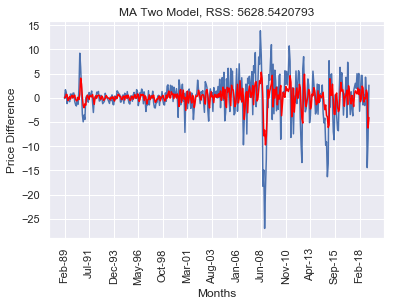

In [29]:
# MA
modelma = ARIMA(crude_oil, order=(0,1,2))  
results_ARIMAma = modelma.fit(disp=-1)  
plt.plot(crude_2)
plt.plot(results_ARIMAma.fittedvalues, color='red')
plt.xlabel('Months')
plt.ylabel('Price Difference')
plt.xticks(np.arange(360,step=29), rotation='vertical')
plt.title('MA Two Model, RSS: %.7f'% sum((results_ARIMAma.fittedvalues-crude_2)**2))
plt.show()

/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


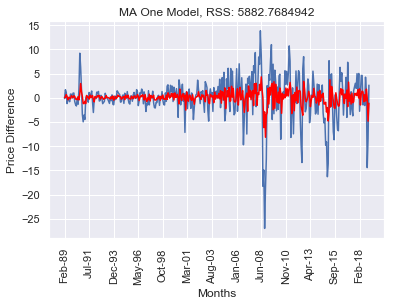

In [30]:
# MA
modelma = ARIMA(crude_oil, order=(0,1,1))  
results_ARIMAma = modelma.fit(disp=-1)  
plt.plot(crude_2)
plt.plot(results_ARIMAma.fittedvalues, color='red')
plt.xlabel('Months')
plt.ylabel('Price Difference')
plt.xticks(np.arange(360,step=29), rotation='vertical')
plt.title('MA One Model, RSS: %.7f'% sum((results_ARIMAma.fittedvalues-crude_2)**2))
plt.show()

/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


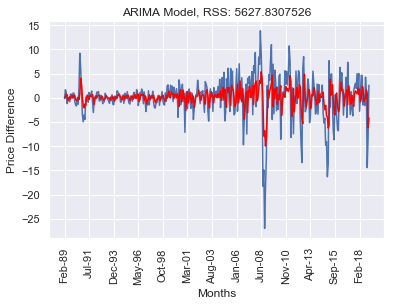

In [31]:
# ARMA
from statsmodels.tsa.arima_model import ARIMA
modelarma = ARIMA(crude_oil, order=(1,1,2))  
results_ARIMAarma = modelarma.fit(disp=-1)  
plt.plot(crude_2)
plt.xlabel('Months')
plt.ylabel('Price Difference')
plt.xticks(np.arange(360,step=29), rotation='vertical')
plt.plot(results_ARIMAarma.fittedvalues, color='red')
plt.title('ARIMA Model, RSS: %.7f'% sum((results_ARIMAarma.fittedvalues-crude_2)**2))
plt.show()

predicted = 60.421045,   expected = 53.970000,   error = 11.953020  %
predicted = 42.651760,   expected = 41.340000,   error = 3.173102  %
predicted = 34.501167,   expected = 43.860000,   error = 21.337969  %
predicted = 45.816230,   expected = 41.840000,   error = 9.503418  %
predicted = 42.003621,   expected = 46.650000,   error = 9.960084  %
predicted = 48.451913,   expected = 50.280000,   error = 3.635814  %
predicted = 52.723741,   expected = 58.150000,   error = 9.331486  %
predicted = 62.249893,   expected = 69.150000,   error = 9.978463  %
predicted = 75.437529,   expected = 64.670000,   error = 16.649959  %
predicted = 63.034190,   expected = 71.630000,   error = 12.000293  %
predicted = 73.213380,   expected = 68.350000,   error = 7.115407  %
predicted = 68.443025,   expected = 74.080000,   error = 7.609308  %
predicted = 75.804421,   expected = 77.550000,   error = 2.250908  %
predicted = 80.255559,   expected = 74.880000,   error = 7.178898  %
predicted = 74.048468,   expec

predicted = 70.879421,   expected = 75.360000,   error = 5.945567  %
predicted = 77.003977,   expected = 76.730000,   error = 0.357066  %
predicted = 77.856036,   expected = 62.320000,   error = 24.929455  %
predicted = 56.161847,   expected = 53.960000,   error = 4.080517  %
predicted = 49.488264,   expected = 56.580000,   error = 12.533997  %

 Mean Error in Predicting Test Set : 6.088653  %


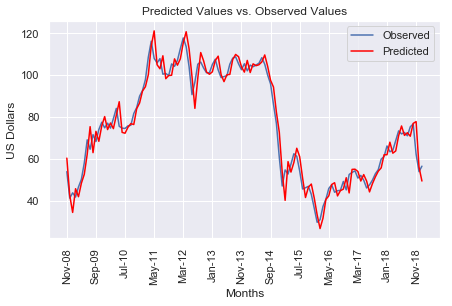

In [33]:
# Splitting the data 66% train, 44% test. Training and testing the model. Plotting the tested fitted values and 
# observation along with the fitted values and observed values for testing set and the errors. Includes average 
# error. 
from sklearn.metrics import mean_squared_error

 
size = int(len(crude_oil) * 0.66)
train, test = crude_oil[0:size], crude_oil[size:len(crude_oil)]
history = [x for x in train]
predictions = list()
error_list = list()
for t in range(len(test)):
    model = ARIMA((history), order=(1,1,2))
    model_fit = model.fit(disp=1)
    output = model_fit.forecast()
    yhat = (output[0]) 
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    error = ((abs(yhat - obs)) / obs) * 100
    error_list.append(error)
    print('predicted = %f,   expected = %f,   error = %f ' % (yhat, obs, error),'%')
print('\n Mean Error in Predicting Test Set : %f ' % (np.mean(error_list)), '%')
plt.figure(figsize=(7, 4))
plt.plot(test)
plt.plot(predictions, color='red')
plt.legend(['Observed','Predicted'])
plt.ylabel('US Dollars')
plt.xlabel('Months')
plt.title('Predicted Values vs. Observed Values')
plt.xticks(np.arange(123,step=10), rotation='vertical' )
plt.show()

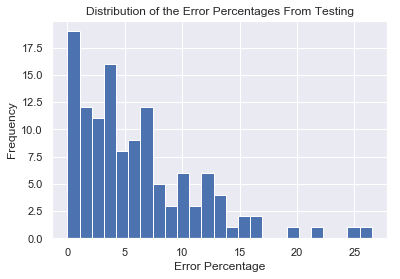

In [443]:
#Plotting the error percentages
a = np.array(error_list, dtype=float)
c = a.tolist()
s = list()
for x in range(len(c)):
    z = c[x][0]
    s.append(z)
import seaborn as sns
sns.set()
plt.hist(s,bins=25)
plt.title('Distribution of the Error Percentages From Testing')
plt.ylabel('Frequency')
plt.xlabel('Error Percentage')
plt.show()

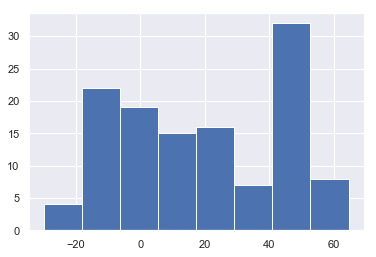

In [437]:
plt.hist(predictions-obs, bins=8)
plt.show()

/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:531: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:531: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:531: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


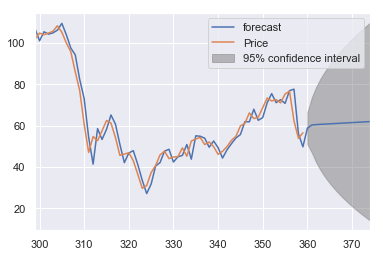

In [34]:
results_ARIMAarma.plot_predict(start=300, end=375)
plt.show()